#Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import string
import nltk
import warnings
warnings.filterwarnings('ignore')

#Loading dataset

In [3]:
df=pd.read_csv('F://Ritesh//Twitter_data.csv')
df.head(5)

,clean_text,category
0,when modi promised “minimum government maximum...,-1
1,talk all the nonsense and continue all the dra...,0
2,what did just say vote for modi welcome bjp t...,1
3,asking his supporters prefix chowkidar their n...,1
4,answer who among these the most powerful world...,1


In [4]:
#Checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   clean_text  162976 non-null  object
 1   category    162980 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.5+ MB


In [5]:
#checking shape of dataset
df.shape

(162980, 2)

#preprocessing dataset

percentage of positive, Negative and neutral tweets

 1    44.33
 0    33.88
-1    21.79
Name: category, dtype: float64


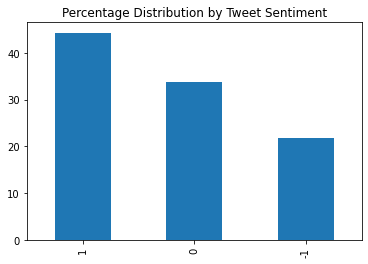

In [6]:
#checking the percentage of positive, Negative and neutral tweets.
print('percentage of positive, Negative and neutral tweets\n')
print( round(df.category.value_counts(normalize=True)*100,2))
round(df.category.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distribution by Tweet Sentiment')
plt.show()

In [7]:
#checking Missing values
df.isnull().sum()

clean_text    4
category      0
dtype: int64

In [8]:
# out of 162980 only 4 rows have null values, so it's better to drop them.
df.dropna(inplace=True)

In [9]:
#Shape of dataset has changed.
df.shape

(162976, 2)

In [10]:
#level 1 data cleaning
#function to convert to Lower case/removing punctuations/Remove @ n # reference from tweet/Removing url's.
# remove square brackets
def text_clean1(text):
    text=text.lower()
    text=text.translate(str.maketrans('','',string.punctuation))
    text=re.sub(r'\@\w+|\#', '',text)
    text=re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text=re.sub('\[.*?]/', '',text)
    text=re.sub('"', '',text)
    return text

In [11]:
df['clean_text1']=pd.DataFrame(df.clean_text.apply(lambda x: text_clean1(x)))

In [12]:
df.head(20)

,clean_text,category,clean_text1
0,when modi promised “minimum government maximum...,-1,when modi promised “minimum government maximum...
1,talk all the nonsense and continue all the dra...,0,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...,1,what did just say vote for modi welcome bjp t...
3,asking his supporters prefix chowkidar their n...,1,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...,1,answer who among these the most powerful world...
5,kiya tho refresh maarkefir comment karo,0,kiya tho refresh maarkefir comment karo
6,surat women perform yagna seeks divine grace f...,0,surat women perform yagna seeks divine grace f...
7,this comes from cabinet which has scholars lik...,0,this comes from cabinet which has scholars lik...
8,with upcoming election india saga going import...,1,with upcoming election india saga going import...
9,gandhi was gay does modi,1,gandhi was gay does modi


In [13]:
df['clean_text1']=df['clean_text1'].str.replace("[^a-zA-Z#]"," ")

In [14]:
df.head(5)

,clean_text,category,clean_text1
0,when modi promised “minimum government maximum...,-1,when modi promised minimum government maximum...
1,talk all the nonsense and continue all the dra...,0,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...,1,what did just say vote for modi welcome bjp t...
3,asking his supporters prefix chowkidar their n...,1,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...,1,answer who among these the most powerful world...


In [15]:
#level 2 data cleaning

#creating stop words set
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
#removing short words
df['clean_text1']=df['clean_text1'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head(5)

,clean_text,category,clean_text1
0,when modi promised “minimum government maximum...,-1,when modi promised minimum government maximum ...
1,talk all the nonsense and continue all the dra...,0,talk nonsense continue drama will vote modi
2,what did just say vote for modi welcome bjp t...,1,what just vote modi welcome told rahul main ca...
3,asking his supporters prefix chowkidar their n...,1,asking supporters prefix chowkidar their names...
4,answer who among these the most powerful world...,1,answer among these most powerful world leader ...


In [17]:
#removing stop words/stemming/Lemmatizing
def text_clean2(text):
    
    text_token= word_tokenize(text)
    filtered_words= [w for w in text_token if w not in stop_words]
    
    ps=PorterStemmer()
    stemmed_words=[ps.stem(w) for w in filtered_words]
        
    lemmatizer= WordNetLemmatizer()
    lemma_words=[lemmatizer.lemmatize(w, pos='a') for w in stemmed_words]
    
    return " ".join(lemma_words)

In [18]:
df['clean_text2']=pd.DataFrame(df.clean_text1.apply(lambda x: text_clean2(x)))

In [19]:
df.tail(20)

,clean_text,category,clean_text1,clean_text2
162960,playing with the insecurities the people with ...,1,playing with insecurities people with credible...,play insecur peopl credibl opposit leader tina...
162961,jha2ji forgets the real indian dream and democ...,1,forgets real indian dream democracy when naren...,forget real indian dream democraci narendra mo...
162962,modi decimates congress front crores congress ...,-1,modi decimates congress front crores congress ...,modi decim congress front crore congress head ...
162963,never seen duffer person like you want modi no...,0,never seen duffer person like want modi vasund...,never seen duffer person like want modi vasund...
162964,great alliance motive only stop modi from powe...,1,great alliance motive only stop modi from powe...,great allianc motiv stop modi power agenda nar...
162965,did some people say modi looking defensive the...,0,some people modi looking defensive these days,peopl modi look defens day
162966,well spoke all about the evils “communism” “hi...,0,well spoke about evils communism hindutva some...,well spoke evil commun hindutva fool issu noti...
162967,azamgarh please poor working requirement jogia...,-1,azamgarh please poor working requirement jogia...,azamgarh pleas poor work requir jogiadhiyanath...
162968,case dont look candidate then that case person...,0,case dont look candidate then that case person...,case dont look candid case person like manmoha...
162969,objective cover everything from akhlaq ramalin...,1,objective cover everything from akhlaq ramalin...,object cover everyth akhlaq ramalingam questio...


In [20]:
df.drop(['clean_text','clean_text1'], inplace=True, axis=1)

In [21]:
df.head(10)

,category,clean_text2
0,-1,modi promis minimum govern maximum govern expe...
1,0,talk nonsens continu drama vote modi
2,1,vote modi welcom told rahul main campaign modi...
3,1,ask support prefix chowkidar name modi great s...
4,1,answer among power world leader today trump pu...
5,0,kiya refresh maarkefir comment karo
6,0,surat women perform yagna seek divin grace nar...
7,0,come cabinet scholar like modi smriti hema tim...
8,1,upcom elect india saga go import pair look cur...
9,1,gandhi modi


#Exploratory Data Analysis

In [22]:
#Visualize frequent words

In [23]:
#!pip install wordcloud

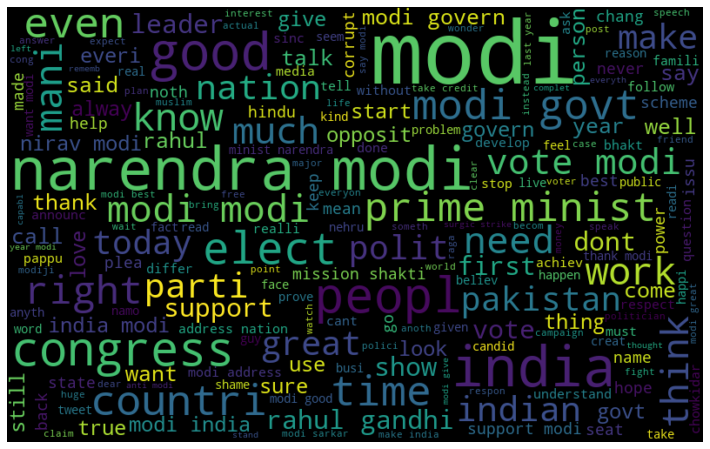

In [24]:
#Visualizing Frequent words that are Positive Tweets

all_words=" ".join([sentence for sentence in df['clean_text2'][df['category']==1]])

from wordcloud import WordCloud
word_cloud=WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)
                    
#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

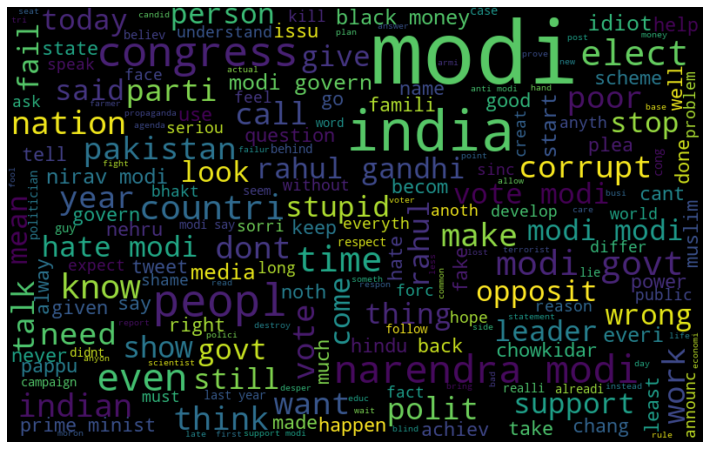

In [25]:
#Visualizing Frequent words that are Negative Tweets

all_words=" ".join([sentence for sentence in df['clean_text2'][df['category']==-1]])

word_cloud=WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)
                    
#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

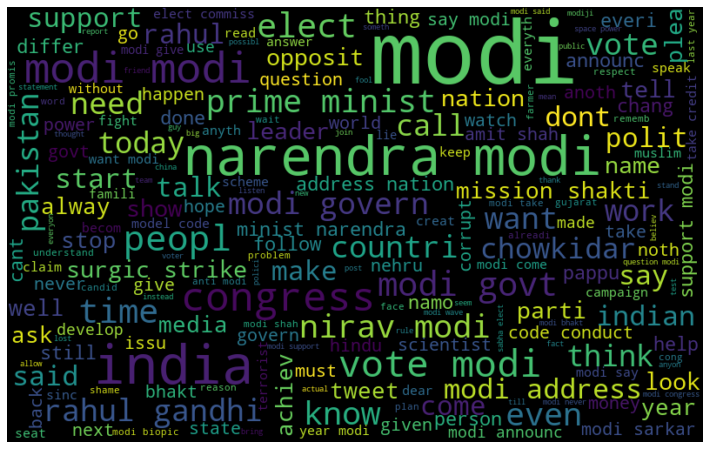

In [26]:
#Visualizing Frequent words that are Neutral Tweets

all_words=" ".join([sentence for sentence in df['clean_text2'][df['category']==0]])

word_cloud=WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)
                    
#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#Train-Test split

In [27]:
from sklearn.model_selection import train_test_split

independent_var=df.clean_text2
dependent_var=df.category

IV_Train, IV_Test, DV_Train, DV_Test= train_test_split(independent_var,dependent_var, test_size=0.1, random_state=225)
print("IV_Train: ", len(IV_Train))
print("IV_Test: ", len(IV_Test))
print("DV_Train: ", len(DV_Train))
print("DV_Test: ",len(DV_Test))

IV_Train:  146678
IV_Test:  16298
DV_Train:  146678
DV_Test:  16298


#Training Model

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score,accuracy_score

tvec=TfidfVectorizer()
clf=BernoulliNB()

In [39]:
from sklearn.pipeline import Pipeline
model=Pipeline([('Vectorizer', tvec),('Classifier',clf)])
model.fit(IV_Train,DV_Train)

Pipeline(steps=[('Vectorizer', TfidfVectorizer()),
                ('Classifier', BernoulliNB())])

In [40]:
prediction=model.predict(IV_Test)

In [41]:
confusion_matrix(prediction,DV_Test)

array([[1559,  237,  455],
       [ 693, 4344, 1087],
       [1287,  856, 5780]], dtype=int64)

In [42]:
#checking accuracy score for built model.
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy: ", accuracy_score(prediction,DV_Test))
print("Precision: ",precision_score(prediction,DV_Test,average='weighted'))
print("Recall: ", recall_score(prediction,DV_Test,average='weighted'))

Accuracy:  0.7168364216468278
Precision:  0.7448112178965617
Recall:  0.7168364216468278


In [48]:
#Classifying on new Tweet
example=["Trump was not that fail"]
result=model.predict(example)
if result==1:
    print("Positive sentimental tweet")
elif result==-1:
    print("Negative sentimental tweet")
else:
    print("Nuetral sentimental tweet")

Nuetral sentimental tweet
